# 1. Get data

In [18]:
import matplotlib.pyplot as plt
import json
import os
import re
import pandas as pd
import numpy as np
import matplotlib 
matplotlib.rcParams['figure.figsize'] = [15, 5]


In [19]:
def get_test_logs(path:str, prefix:str, get_only_latest:bool):
    """get all test result filenames
    Args:
        path (str): path to test_cases
        prefix (str): prefix of log file
        get_only_latest (bool): if true return only latest file else return all files
    Returns:
        list of dicts, each dict corresponds for testcase 0-49
    """
    test_cases = [folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path,folder)) and (re.fullmatch(r"test_number_\d+",folder) is not None)]
    result_files = []
    for test in test_cases:
        files = os.listdir(os.path.join(path,test))
        matched_files = [file for file in files if re.match(re.escape(prefix), file) is not None]
        if get_only_latest:
            if len(matched_files)!=0:
                matched_files = [max(matched_files,key = lambda s: int(re.findall(r"\d+\.json",s)[0][:-5]))]
        result_files.append({
            "test_case_id":int(re.findall(r"\d+",test)[0]),
            "file_path":[os.path.join(path,test,file) for file in matched_files]
        })
    return result_files


In [20]:
stats = {}
test_dirs = [folder for folder in os.listdir("./tests") if os.path.isdir(os.path.join("./tests",folder))]
for challenge in test_dirs:
    ok_task = []
    stats[challenge] = {}
    strrt_test_files = get_test_logs(path = os.path.join("./tests",challenge),prefix = "S", get_only_latest = False)
    drgbt_test_files = get_test_logs(path = os.path.join("./tests",challenge),prefix = "D",  get_only_latest = False)
    msirrt_test_files = get_test_logs(path = os.path.join("./tests",challenge),prefix = "M",  get_only_latest = False)

    for file_data in strrt_test_files:
        if len(file_data["file_path"]) == 0:
            continue
        for file_path in file_data["file_path"]:
            try:
                    
                with open(file_path, 'r') as file:
                    data = json.load(file)
                if file_data["test_case_id"] not in stats[challenge]:
                    stats[challenge][file_data["test_case_id"]] = {}
                if 'strrt' not in stats[challenge][file_data["test_case_id"]]:
                    stats[challenge][file_data["test_case_id"]]['strrt'] = []
                stats[challenge][file_data["test_case_id"]]['strrt'].append(data)
            except UnicodeDecodeError as e:
                print(file_path,e)
            except json.JSONDecodeError as e:
                print(file_path,e)
        
    for file_data in msirrt_test_files:

        if len(file_data["file_path"]) == 0:
                continue
        for file_path in file_data["file_path"]:
            try:
                
                with open(file_path, 'r') as file:
                    data = json.load(file)
                if file_data["test_case_id"] not in stats[challenge]:
                    stats[challenge][file_data["test_case_id"]] = {}
                if 'msirrt' not in stats[challenge][file_data["test_case_id"]]:
                    stats[challenge][file_data["test_case_id"]]['msirrt'] = []
                stats[challenge][file_data["test_case_id"]]['msirrt'].append(data)
            except UnicodeDecodeError as e:
                print(file_path,e)
            except json.JSONDecodeError as e:
                print(file_path,e)
                
    for file_data in drgbt_test_files:

        if len(file_data["file_path"]) == 0:
                continue
        for file_path in file_data["file_path"]:
            try:
                
                with open(file_path, 'r') as file:
                    data = json.load(file)
                if file_data["test_case_id"] not in stats[challenge]:
                    stats[challenge][file_data["test_case_id"]] = {}
                if 'drgbt' not in stats[challenge][file_data["test_case_id"]]:
                    stats[challenge][file_data["test_case_id"]]['drgbt'] = []
                stats[challenge][file_data["test_case_id"]]['drgbt'].append(data)
            except UnicodeDecodeError as e:
                print(file_path,e)
            except json.JSONDecodeError as e:
                print(file_path,e)



./tests/1_spheres/test_number_45/STRRT*_planner_logs_1729819221.json Extra data: line 1 column 3285 (char 3284)
./tests/1_spheres/test_number_44/STRRT*_planner_logs_1729819240.json Extra data: line 1 column 3589 (char 3588)
./tests/1_spheres/test_number_12/STRRT*_planner_logs_1729819221.json Extra data: line 1 column 3959 (char 3958)
./tests/1_spheres/test_number_41/MSIRRT_planner_logs_1729819221.json Extra data: line 1 column 1238 (char 1237)
./tests/1_spheres/test_number_36/MSIRRT_planner_logs_1729819221.json Extra data: line 1 column 1232 (char 1231)
./tests/1_spheres/test_number_0/MSIRRT_planner_logs_1729819221.json Extra data: line 1 column 1226 (char 1225)
./tests/1_spheres/test_number_28/MSIRRT_planner_logs_1729819240.json Extra data: line 1 column 1230 (char 1229)
./tests/1_spheres/test_number_2/MSIRRT_planner_logs_1729819240.json Extra data: line 1 column 1559 (char 1558)


# Execution Time

In [22]:
execution_time_stats1={}
execution_time_stats1["test"]=[]
execution_time_stats1["algorithm_solving_time"]=[]
execution_time_stats1["planner_type"]=[]
execution_time_stats1["has_result"]=[]
execution_time_stats1["arrival_time"]=[]

for challenge in stats:
        
    
    for test in stats[challenge]: 
        if 'strrt' in stats[challenge][test] and 'msirrt' in stats[challenge][test] and 'drgbt' in stats[challenge][test]:
                tstrrt, tmsirrt = [], []
                try:
                     for i in range(10):
                       if stats[challenge][test]['strrt'][i]['final_planner_data']['has_result']:
                            tstrrt.append(stats[challenge][test]['strrt'][i]['final_planner_data']['final_path'][-1]['time'])
                       if stats[challenge][test]['msirrt'][i]['final_planner_data']['has_result']:
                            tmsirrt.append(stats[challenge][test]['msirrt'][i]['final_planner_data']['final_path'][-1]['time'])
                except:
                     pass

                execution_time_stats1["test"].append(int(challenge[:challenge.find('_')]))
                execution_time_stats1["planner_type"].append('strrt')
                
                execution_time_stats1["has_result"].append(stats[challenge][test]['strrt'][0]['final_planner_data']['has_result'])
                execution_time_stats1["algorithm_solving_time"].append(np.mean(tstrrt))
                
                
                execution_time_stats1["test"].append(int(challenge[:challenge.find('_')]))
                execution_time_stats1["planner_type"].append('msirrt')
                execution_time_stats1["has_result"].append(stats[challenge][test]['msirrt'][0]['final_planner_data']['has_result'])
                execution_time_stats1["algorithm_solving_time"].append(np.mean(tmsirrt))
                

                execution_time_stats1["test"].append(int(challenge[:challenge.find('_')]))
                execution_time_stats1["planner_type"].append('drgbt')
                execution_time_stats1["has_result"].append(stats[challenge][test]['drgbt'][0]['final_planner_data']['has_result'])
                execution_time_stats1["algorithm_solving_time"].append(0)
                       
                
                
execution_time_stats = pd.DataFrame(execution_time_stats1)


In [23]:

import pandas as pd
import numpy as np

execution_time_stats1={}
execution_time_stats1["test"]=[]
execution_time_stats1["algorithm_solving_time"]=[]
execution_time_stats1["arrival_time"]=[]
execution_time_stats1["planner_type"]=[]
execution_time_stats1["has_result"]=[]

for challenge in stats:
        
    
    for test in stats[challenge]: 
        for planner_type in ['strrt','msirrt','drgbt']:
            if planner_type in stats[challenge][test]:
                execution_time_stats1["test"].append(int(challenge[:challenge.find('_')]))
                execution_time_stats1["algorithm_solving_time"].append(np.mean(np.array([x['algorithm_solving_time_ns']/10**9 for x in stats[challenge][test][planner_type]])))
                execution_time_stats1["planner_type"].append(planner_type)
                execution_time_stats1["has_result"].append(np.mean(np.array([x['final_planner_data']['has_result'] for x in stats[challenge][test][planner_type]])))
                if execution_time_stats1["has_result"][-1]:
                    execution_time_stats1["arrival_time"].append(np.mean(np.array([x['final_planner_data']['final_path'][-1]["time"] for x in stats[challenge][test][planner_type] if x['final_planner_data']['has_result']])))
                else:
                    execution_time_stats1["arrival_time"].append(-1)

            elif planner_type == 'drgbt':
                execution_time_stats1["test"].append(int(challenge[:challenge.find('_')]))
                execution_time_stats1["algorithm_solving_time"].append(0)
                execution_time_stats1["planner_type"].append(planner_type)
                execution_time_stats1["has_result"].append(False)
                execution_time_stats1["arrival_time"].append(-1)
            else:
                assert(False)

execution_time_stats = pd.DataFrame(execution_time_stats1)

In [24]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(execution_time_stats.groupby(["test","planner_type"]).mean())

                   algorithm_solving_time  arrival_time has_result
test planner_type                                                 
1    drgbt                       0.000000     -1.000000        0.0
     msirrt                      0.000627     19.046440        1.0
     strrt                       0.002740     10.630489        1.0


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


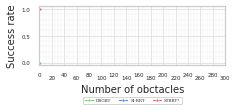

In [25]:
import seaborn as sns
import matplotlib as mpl

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=0.5, rc={"lines.linewidth": 1, "lines.markersize": 3})
sns.set_palette("muted")
fig, ax = plt.subplots(figsize=(3.4, 2))  # ширина 3.4 дюйма, высота 2.5 дюйма

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Serif"],  # Specific font, commonly used in scientific journals
    "font.size": 10,                # General font size
    "axes.titlesize": 12,           # Font size for title
    "axes.labelsize": 1000,           # Font size for axis labels
    "legend.fontsize": 4,           # Font size for legend
    "xtick.labelsize": 9,           # Font size for x-tick labels
    "ytick.labelsize": 9,           # Font size for y-tick labels
})


success_rate = execution_time_stats.groupby(["test","planner_type"]).mean()
pl = sns.lineplot(x="test", y="has_result",
             hue="planner_type",
             data=success_rate,marker="o", dashes=False, ax = ax, 
             palette=[sns.color_palette("muted")[2],sns.color_palette("muted")[0],sns.color_palette("muted")[3]],
             legend=True)
# pl.get_legend().remove()

new_title = ''
pl.legend_.set_title(new_title)
# replace labels
new_labels = ['DRGBT','SI-RRT','STRRT*']
for t, l in zip(pl.legend_.texts, new_labels):
    t.set_text(l)
    

sns.move_legend(ax, ncol=4, bbox_to_anchor=(0.5, -0.5), loc="upper center")

pl.set_xticks(range(0,301,20))

ax.minorticks_on()
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linewidth=0.4)

pl.set_ylabel("Success rate",fontsize=10)
pl.set_xlabel("Number of obctacles",fontsize=10)
# Stagger the x-axis labels
for i, label in enumerate(ax.get_xticklabels()):
    label.set_y(0.05 if i % 2 == 0 else 0)  # Alternates y position for staggered effect


plt.tight_layout()

plt.savefig("success_rate.pdf", format="pdf", bbox_inches="tight")

# pl.set_ylim(0,1.1)
plt.show()

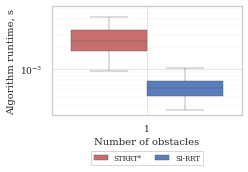

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and context
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=0.5, rc={"lines.linewidth": 0.005, "lines.markersize": 0})
sns.set_palette("muted")

# Configure font for scientific style
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Serif"],   # Use DejaVu Serif if Times New Roman is unavailable
    "font.size": 10,                  # General font size
    "axes.titlesize": 12,             # Font size for title
    "axes.labelsize": 10,             # Font size for axis labels
    "legend.fontsize": 7,             # Font size for legend
    "xtick.labelsize": 9,             # Font size for x-tick labels
    "ytick.labelsize": 9              # Font size for y-tick labels
})

# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(3.4, 2))  # Width: 3.4 inches, Height: 2 inches



# Boxplot with log-scaled y-axis
pl = sns.boxplot(
    x="test", y="algorithm_solving_time",
    hue="planner_type", data=execution_time_stats.loc[
        (execution_time_stats['test'] <= 120) &
        (execution_time_stats['planner_type'].isin(['strrt', 'msirrt']))
    ],
    ax=ax,
    palette=[sns.color_palette("muted")[3],sns.color_palette("muted")[0]],
    linewidth=0.4
)

# Adjust the plot labels
new_title = ''
pl.legend_.set_title(new_title)
# replace labels
new_labels = ['STRRT*','SI-RRT']
for t, l in zip(pl.legend_.texts, new_labels):
    t.set_text(l)
    

sns.move_legend(ax, ncol=4, bbox_to_anchor=(0.5, -0.3), loc="upper center")

pl.set_yscale('log')

pl.set_xlabel("Number of obstacles")
pl.set_ylabel("Algorithm runtime, s")

# Enable minor ticks
pl.minorticks_on()

# Customize the grid
pl.grid(which='major', color='#DDDDDD', linewidth=0.8)
pl.grid(which='minor', color='#EEEEEE', linewidth=0.4)
# raw_adc_ax.yaxis.set_minor_formatter(FormatStrFormatter("%3d"))
# Stagger the x-axis labels for readability
# for i, label in enumerate(ax.get_xticklabels()):
#     label.set_y(0.05 if i % 2 == 0 else 0)

# Save and display the plot
# plt.tight_layout()
plt.savefig("algo_time.pdf", format="pdf", bbox_inches="tight")
plt.show()


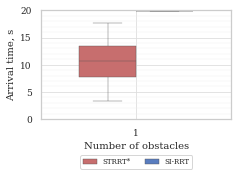

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and context
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=0.5, rc={"lines.linewidth": 0.03, "lines.markersize": 0})
sns.set_palette("muted")

# Configure font for scientific style
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Serif"],   # Use DejaVu Serif if Times New Roman is unavailable
    "font.size": 10,                  # General font size
    "axes.titlesize": 12,             # Font size for title
    "axes.labelsize": 10,             # Font size for axis labels
    "legend.fontsize": 7,             # Font size for legend
    "xtick.labelsize": 9,             # Font size for x-tick labels
    "ytick.labelsize": 9              # Font size for y-tick labels
})

# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(3.4, 2))  # Width: 3.4 inches, Height: 2 inches



# Boxplot with log-scaled y-axis
pl = sns.boxplot(
    x="test", y="arrival_time",
    hue="planner_type", data=execution_time_stats.loc[
        (execution_time_stats['test'] <= 120) &
        (execution_time_stats['planner_type'].isin(['strrt', 'msirrt']))
    ],
    ax=ax,
    palette=[sns.color_palette("muted")[3],sns.color_palette("muted")[0]],
    linewidth=0.4,
    width=0.6
)

new_title = ''
pl.legend_.set_title(new_title)
# replace labels
new_labels = ['STRRT*','SI-RRT']
for t, l in zip(pl.legend_.texts, new_labels):
    t.set_text(l)
    

sns.move_legend(ax, ncol=4, bbox_to_anchor=(0.5, -0.3), loc="upper center")

# pl.set_yscale('log')

pl.set_ylim(0,20)
pl.set_xlabel("Number of obstacles")# pl.set_yscale('log')
pl.set_ylabel("Arrival time, s")

# Enable minor ticks
pl.minorticks_on()

# Customize the grid
pl.grid(which='major', color='#DDDDDD', linewidth=0.8)
pl.grid(which='minor', color='#EEEEEE', linewidth=0.4)
# raw_adc_ax.yaxis.set_minor_formatter(FormatStrFormatter("%3d"))
# Stagger the x-axis labels for readability
# for i, label in enumerate(ax.get_xticklabels()):
#     label.set_y(0.05 if i % 2 == 0 else 0)

# Save and display the plot
# plt.tight_layout()
plt.savefig("arrive_time.pdf", format="pdf", bbox_inches="tight")
plt.show()
